In [45]:
from google.colab import drive
mydrive = '/content/drive/'
drive.mount(mydrive)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# K-means Clustering for Image Segmentation in Python

In [0]:
import cv2, glob, os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, load_img

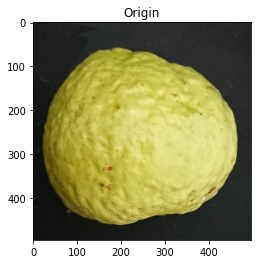

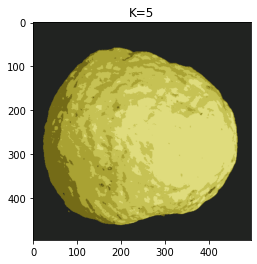

In [47]:
image = cv2.imread("/content/drive/My Drive/Project/2.7.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
#image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR)

# show the image
plt.imshow(image)
plt.title('Origin')
plt.show()
plt.imshow(segmented_image)
plt.title('K='+str(k))
plt.show()

# FFT

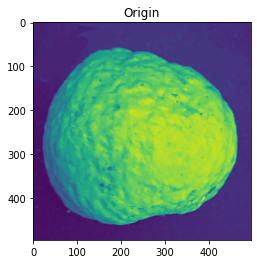

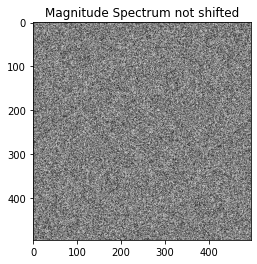

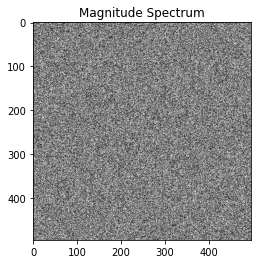

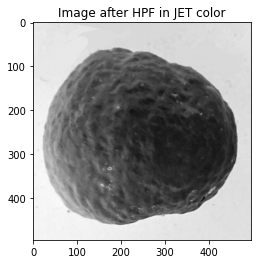

In [48]:
image = cv2.imread("/content/drive/My Drive/Project/2.7.jpg")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# show the image
plt.imshow(image)
plt.title('Origin')
plt.show()


fft = np.fft.fft2(image)
magnitude_spectrum = 20 * np.log(np.abs(fft))
plt.imshow((magnitude_spectrum * 255).astype(np.uint8), cmap = 'gray')
plt.title('Magnitude Spectrum not shifted')
plt.show()

dft_shift = np.fft.fftshift(fft) # 將低頻部分移動到影象中心
assert dft_shift.any() is not 0
magnitude_spectrum_shift = 20 * np.log(np.abs(dft_shift))
plt.imshow((magnitude_spectrum_shift * 255).astype(np.uint8), cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

## idft_shift = np.fft.ifftshift(dft_shift) # inverse DFT

dft_ishift = np.fft.ifftshift(dft_shift)
image_back = np.fft.ifft2(dft_ishift)
image_back = np.abs(image_back)


plt.imshow((image_back * 255).astype(np.uint8), cmap = 'gray')
plt.title('Image after HPF in JET color')
plt.show()


# 3D plot

閾值 = thres, 最大灰度值 = max\
Threshold Binary：即二值化，將大於閾值的灰度值設為最大灰度值，小於閾值的值設為0。\
Threshold Binary, Inverted：將大於閾值的灰度值設為0，其他值設為最大灰度值。\
Truncate：將大於閾值的灰度值設為閾值，小於閾值的值保持不變。\
Threshold to Zero：將小於閾值的灰度值設為0，大於閾值的值保持不變。\
Threshold to Zero, Inverted：將大於閾值的灰度值設為0，小於閾值的值保持不變。


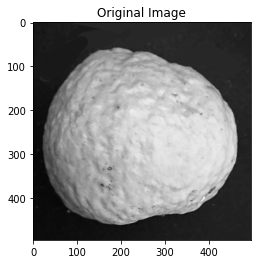

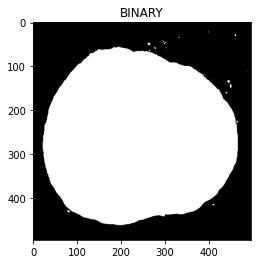

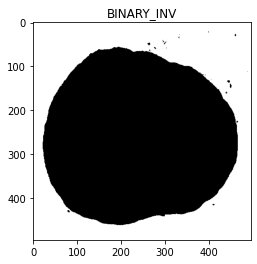

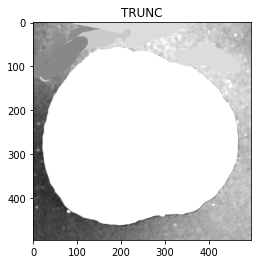

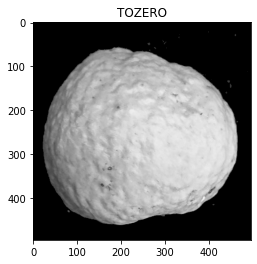

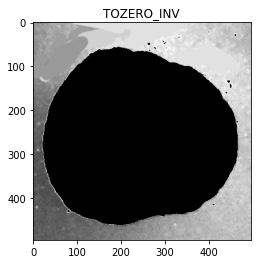

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

image = cv2.imread("/content/drive/My Drive/Project/2.7.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thres = 50
max_ = 255

ret,thresh1 = cv2.threshold(image,thres,max_,cv2.THRESH_BINARY)

ret,thresh2 = cv2.threshold(image,thres,max_,cv2.THRESH_BINARY_INV)

ret,thresh3 = cv2.threshold(image,thres,max_,cv2.THRESH_TRUNC)

ret,thresh4 = cv2.threshold(image,thres,max_,cv2.THRESH_TOZERO)

ret,thresh5 = cv2.threshold(image,thres,max_,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.plot
    plt.imshow(images[i],'gray')
    plt.title(titles[i])

    plt.show()

In [0]:
def compute_avg(image, fore_indices):
    sum_ = 0
    for i in range(len(fore_indices[0])):
        sum_ = sum_ + image[ fore_indices[0][i] ][ fore_indices[1][i] ]
    avg = sum_ / len(fore_indices[0])
    return avg

# Surface

compute "foreground" pixel avg only
turn background value to mean
good!


(array([  0,   0,   0, ..., 495, 495, 495]), array([  0,   1,   2, ..., 493, 494, 495]))
140151
140151
75.06331311155273
27.631218105747273


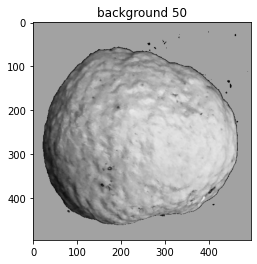

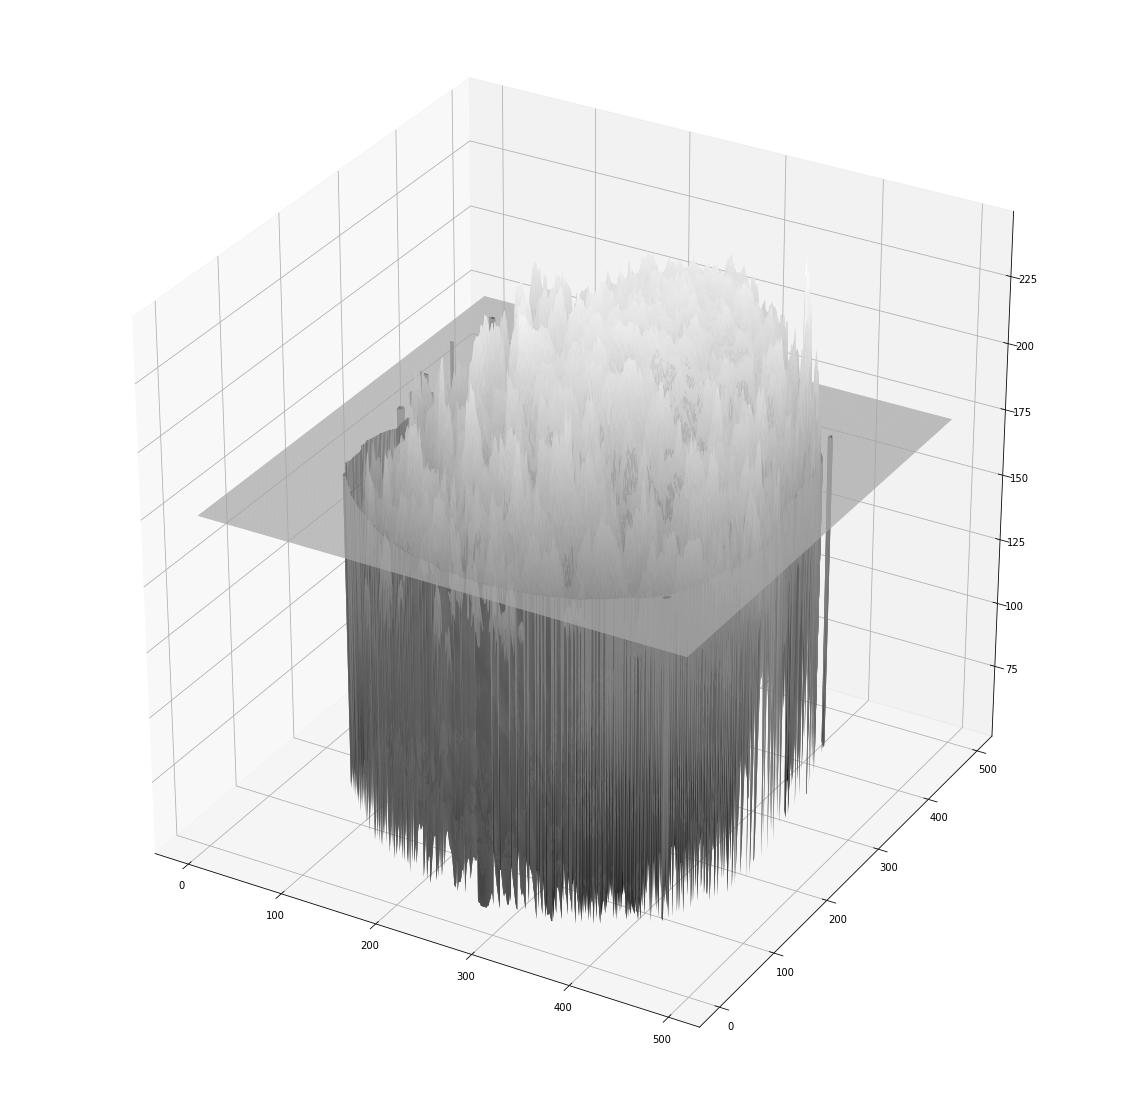

"\n\na = pi / 4\nt = np.transpose(np.array([xx, yy, image_copy]), (1,2,0))\nm = [[cos(a), 0, sin(a)],\n     [0, 1, 0],\n     [-sin(a), 0, cos(a)]]\nx,y,z = np.transpose(np.dot(t, m), (2,0,1))\n\nfig = plt.figure()\nax = fig.gca(projection='3d')\nax.plot_surface(x,y,z  ,rstride=1, cstride=1, cmap='gray', linewidth=0)\nplt.show()\n"

In [91]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sin, cos, pi

image = cv2.imread("/content/drive/My Drive/Project/2.7.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
"""
print(np.mean(image))
fore_indices = np.where(image != 0)
print(compute_avg(image, fore_indices ))
"""


dark = 50
max_ = 255
ret,thres = cv2.threshold(image,dark,max_,cv2.THRESH_TOZERO)
image_copy = thres

back_indices = np.where(thres == 0)
fore_indices = np.where(thres != 0)

print(back_indices)
print(len(fore_indices[0]))
print(len(fore_indices[1]))

image_copy[back_indices] = compute_avg(image, fore_indices)
print(np.std(image))
print(np.std(image_copy))

plt.imshow(image_copy, cmap = 'gray')
plt.title('background 50')
plt.show()


xx, yy = np.mgrid[0:image_copy.shape[0], 0:image_copy.shape[1]]

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, image_copy ,rstride=1, cstride=1, cmap='gray', linewidth=0)
# ax.set_xlim3d(0, image_copy.shape[0])
# ax.set_ylim3d(0, image_copy.shape[1])
plt.show()

"""

a = pi / 4
t = np.transpose(np.array([xx, yy, image_copy]), (1,2,0))
m = [[cos(a), 0, sin(a)],
     [0, 1, 0],
     [-sin(a), 0, cos(a)]]
x,y,z = np.transpose(np.dot(t, m), (2,0,1))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z  ,rstride=1, cstride=1, cmap='gray', linewidth=0)
plt.show()
"""

75.06331311155273
27.631218105747273


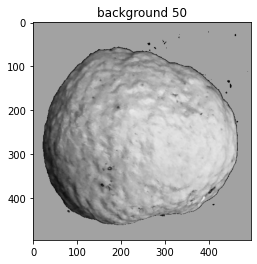

71.15233072476968
25.909912317748333


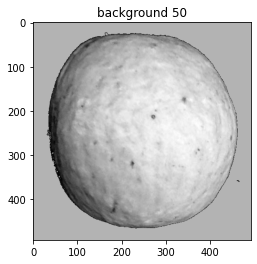

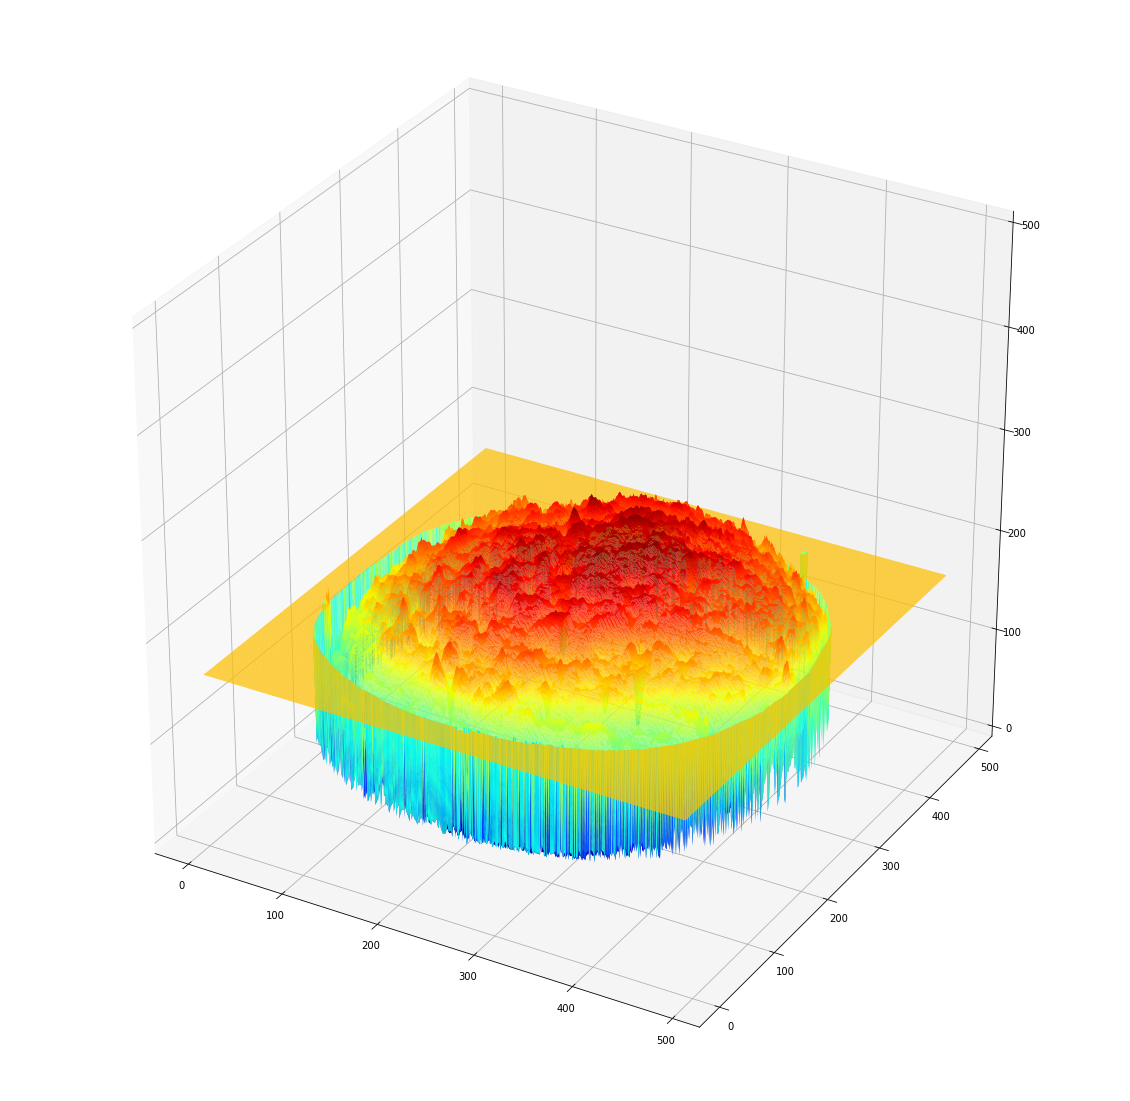

In [95]:
image = cv2.imread("/content/drive/My Drive/Project/2.7.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thres = 50
max_ = 255
ret,thres = cv2.threshold(image,thres,max_,cv2.THRESH_TOZERO)
image_copy = thres

back_indices = np.where(thres == 0)
fore_indices = np.where(thres != 0)

image_copy[back_indices] = compute_avg(image, fore_indices)
print(np.std(image))
print(np.std(image_copy))

plt.imshow(image_copy, cmap = 'gray')
plt.title('background 50')
plt.show()


xx, yy = np.mgrid[0:image_copy.shape[0], 0:image_copy.shape[1]]

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, image_copy ,rstride=1, cstride=1, cmap='jet', linewidth=0)
ax.set_zlim3d(0,500)
plt.show()

image = cv2.imread("/content/drive/My Drive/Project/3.3.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thres = 50
max_ = 255
ret,thres = cv2.threshold(image,thres,max_,cv2.THRESH_TOZERO)
image_copy = thres

back_indices = np.where(thres == 0)
fore_indices = np.where(thres != 0)

image_copy[back_indices] = compute_avg(image, fore_indices)
print(np.std(image))
print(np.std(image_copy))

plt.imshow(image_copy, cmap = 'gray')
plt.title('background 50')
plt.show()


xx, yy = np.mgrid[0:image_copy.shape[0], 0:image_copy.shape[1]]

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, image_copy ,rstride=1, cstride=1, cmap='jet', linewidth=0)
ax.set_zlim3d(0,500)
plt.show()


#**Multi image**

# Image read

In [0]:
def loading_all_data(img_path):
    imgs = []
    path = img_path+ '/*.jpg'
    imgs = imgs + [img_to_array(load_img(img)) for img in glob.glob(path)]
    return imgs

In [0]:
src_path = '/content/drive/My Drive/Project/0425guava-classified/1'
images = loading_all_data(src_path)

Check

In [54]:
print("Total image number:" , len(images))
print(images[0].shape[0])
print(images[0].shape[1])
print(images[0].shape[2])


Total image number: 70
677
720
3


# Preprocess before clustering

In [0]:
pixel_values = []
image_shapes = []
for image in images: 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_shapes.append(image.shape)
  # reshape the image to a 2D array of pixels and 3 color values (RGB)
  # convert to float ( cv2.kmeans() expects float)
  pixel_values.append( np.float32(image.reshape((-1, 3))) ) 

In [56]:
print(len(pixel_values))
print(pixel_values[0].shape)

70
(487440, 3)


# Clustering

Since this is a large number of data points, so it'll take a lot of time to process.

> We are going to stop either when some **number of iterations exceeded** (say 100) **or** if the **clusters move less than some epsilon value** (let's pick 0.2 here)


In [0]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
# k: number of clusters
k = 5

In [0]:
labels_list = []
centers_list = []
for pixel_value in pixel_values:
  _, labels, (centers) = cv2.kmeans(pixel_value, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  # convert back to 8 bit values
  centers = np.uint8(centers)
  # flatten the labels array
  labels = labels.flatten()

  labels_list.append(labels)
  centers_list.append(centers)

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Construct the segmented image:

In [0]:
segmented_images = []
for i in range(len(images)):
  # convert all pixels to the color of the centroids
  segmented_image = centers_list[i][labels_list[i].flatten()]

  # reshape back to the original image dimension
  segmented_image = segmented_image.reshape(image_shapes[i])
  segmented_images.append(segmented_image)


# Result check

In [61]:
# show the image
for i in range(len(images)):

  plt.subplot(1,2,1)
  plt.imshow((images[i]).astype(np.uint8))
  plt.title(str(i)+'-before')
  plt.subplot(1,2,2)
  plt.imshow(cv2.cvtColor(segmented_images[i], cv2.COLOR_RGB2BGR))
  plt.title(str(i)+'-after')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

# More: filter the pixels


In [62]:

for i in range(len(images)):

# disable only the cluster number 2 (turn the pixel into black)
  masked_image = np.copy(images[i])
# convert to the shape of a vector of pixel values
  masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
  cluster = 0
  masked_image[labels_list[i] == cluster] = [255, 255, 255]
# convert back to original shape
  masked_image = masked_image.reshape(images[i].shape)
# show the image
  plt.imshow(masked_image.astype(np.uint8))
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

#=======================================